In [1]:
# Alireza Samari
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [5]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [6]:
list_del_row=[]
for i in range(len(df['Area'])):
    if (',' in df['Area'][i]) or (pd.isna(df['Address'][i])):
        list_del_row.append(i)
        
print(list_del_row)
df= df.drop(list_del_row, axis = 0)

[43, 570, 662, 706, 709, 807, 1108, 1109, 1577, 1604, 1796, 2071, 2072, 2127, 2171, 2243, 2337, 2426, 2728, 2802, 3025, 3176, 3262, 3295, 3315, 3318, 3355, 3401, 3434]


In [7]:
print("Skewness: " ,df['Area'].skew())
print("Kurtosis: " ,df['Area'].kurt())

Skewness:  4.488353719708791
Kurtosis:  32.96504368016486


In [8]:
df.isnull().sum()
# Data is fine!

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Count'>

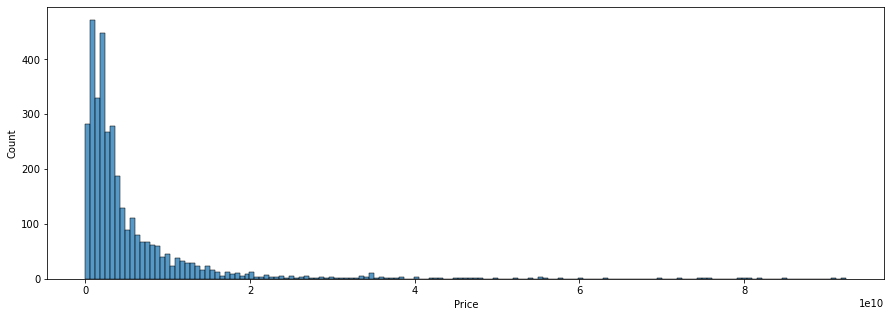

In [9]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.histplot(df['Price'])

<AxesSubplot:>

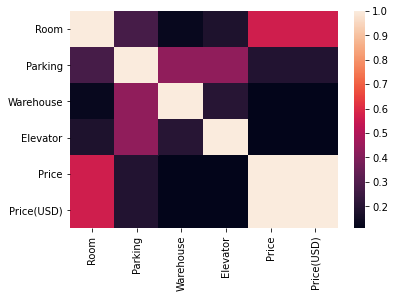

In [10]:

sns.heatmap(df.corr())
# Relation between the data !

In [11]:
from sklearn.preprocessing import LabelEncoder
df['Address'] = LabelEncoder().fit_transform(df['Address'])
df['Address'].head()

0    156
1    156
2    117
3    152
4    150
Name: Address, dtype: int32

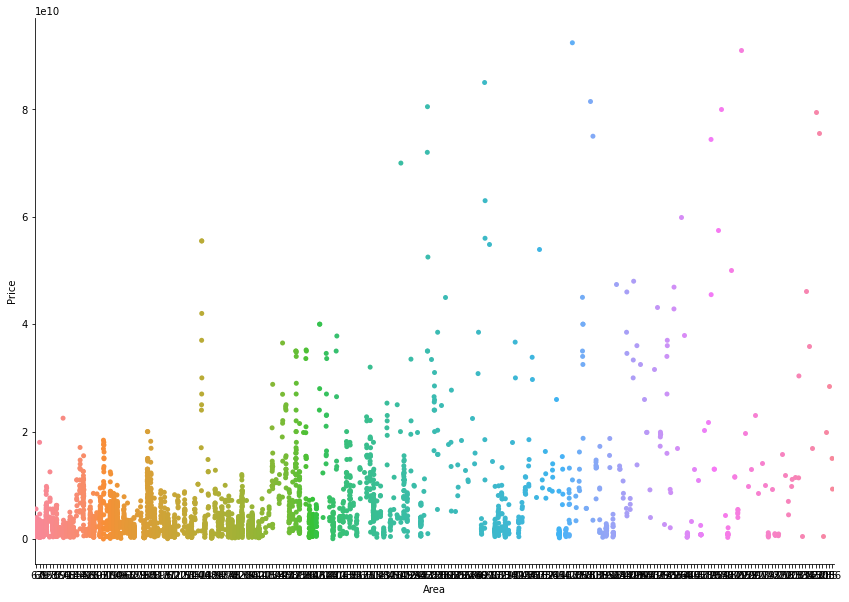

In [12]:
sns.catplot(x = 'Area', y='Price', data=df, height=8.27, aspect=11.7/8.27)

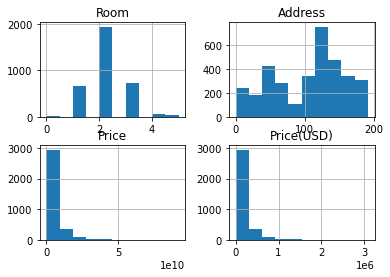

In [13]:
df.hist()
plt.show()

In [14]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [15]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [16]:
from sklearn import linear_model
lin_reg= linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']])
train_y = np.asanyarray(train[['Price']])
lin_reg.fit(train_x, train_y)
print('coefficients: ',lin_reg.coef_)
print('intercept: ', lin_reg.intercept_)

coefficients:  [[ 6.99654205e+07  1.37293379e+09 -1.35915639e+08  1.04232640e+09
   9.10132350e+08  1.46995352e+06]]
intercept:  [-6.71433878e+09]


In [17]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']])
test_y = np.asanyarray(test[['Price']])
test_y_ = lin_reg.predict(test_x)
print(r2_score(test_y , test_y_))

0.5387278588133513
